# Classificação

## Nível de Adaptação de Estudantes no EAD

https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

In [2]:
from utils import carrega_dataset_EAD

dataset = carrega_dataset_EAD()
dataset


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


## Codificação


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

codificadores = {coluna: LabelEncoder() for coluna in dataset.columns}
dataset_codificado = pd.DataFrame()

for coluna in dataset:
    dataset_codificado[coluna] = codificadores[coluna].fit_transform(dataset[coluna])

dataset_codificado


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


## Modelo

In [4]:
from sklearn.ensemble import RandomForestClassifier

X = dataset_codificado.iloc[:, 1:13]
modelo = RandomForestClassifier(oob_score=True)
fit = modelo.fit(X, dataset_codificado['Adaptivity Level'])

## Importâncias

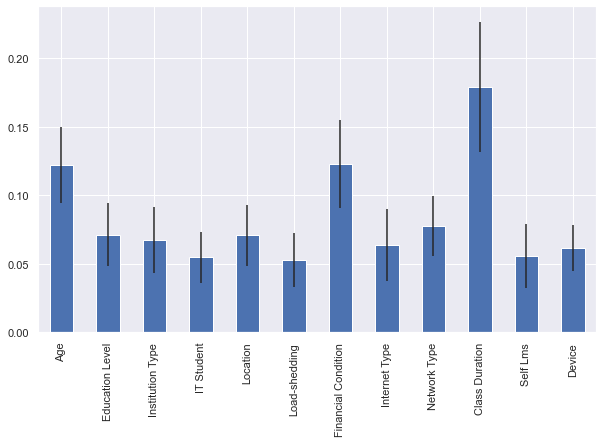

In [5]:
import numpy as np
import seaborn as sns

sns.set_theme()
sns.set_theme("notebook")
sns.set(rc={"figure.figsize": [10, 6]})

desvio_padrao_estimadores = np.std(
    [arvore.feature_importances_ for arvore in modelo.estimators_], axis=0)

importancias = pd.Series(modelo.feature_importances_,
                         index=modelo.feature_names_in_)
importancias.plot.bar(yerr=desvio_padrao_estimadores);


# Visualização de uma única árvore

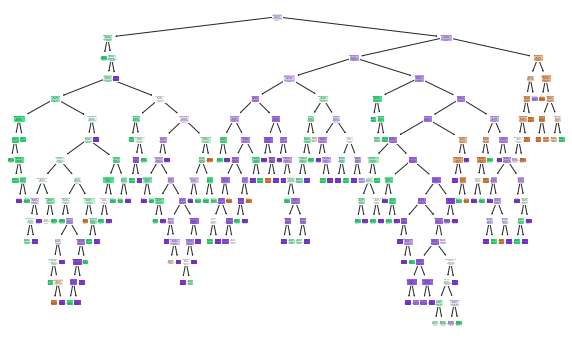

In [6]:
from sklearn import tree

tree.plot_tree(modelo.estimators_[0],
               feature_names=modelo.feature_names_in_.tolist(),
               class_names='Adaptivity Level',
               filled=True);

In [7]:
texto = tree.export_text(modelo.estimators_[0],
                         feature_names=modelo.feature_names_in_.tolist())

print(texto)


|--- Institution Type <= 0.50
|   |--- Network Type <= 0.50
|   |   |--- class: 1.0
|   |--- Network Type >  0.50
|   |   |--- Device <= 1.50
|   |   |   |--- Internet Type <= 0.50
|   |   |   |   |--- Class Duration <= 0.50
|   |   |   |   |   |--- Financial Condition <= 0.50
|   |   |   |   |   |   |--- Age <= 2.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Age >  2.50
|   |   |   |   |   |   |   |--- Education Level <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Education Level >  1.50
|   |   |   |   |   |   |   |   |--- Location <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |--- Location >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Financial Condition >  0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Class Duration >  0.50
|   |   |   |   |   |--- Class Duration <= 1.50
|   |   |   |   |   |   |--- Self Lms